In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Carica il file JSON in un oggetto python
with open('data/difficulty.json', 'r') as file:
    data = json.load(file)

# Normalizza i dati del file JSON
df = pd.json_normalize(data, 'difficulty', ['metric1', 'metric2'])



In [20]:
# Crea una lista di date partendo dal 23 dicembre 2021 fino al 22 dicembre 2022
dates = pd.date_range(start='2021-12-23', end='2022-12-21', freq='D')

# Crea una nuova colonna "date" nel tuo dataframe e assegna ad ogni riga una data
df['date'] = dates

In [21]:
df.shape

(364, 5)

In [22]:
# Converte la colonna "date" in una colonna di stringhe nel formato yyyy-mm-dd
#df['date'] = df['date'].dt.strftime('%Y-%m-%d')

df = df.drop(['x', 'metric1', 'metric2'], axis=1)
df.tail()

,y,date
359,3.460660e+13,2022-12-17
360,3.536407e+13,2022-12-18
361,3.536407e+13,2022-12-19
362,3.536407e+13,2022-12-20
363,3.536407e+13,2022-12-21


In [23]:
df.rename(columns={'date': 'time'}, inplace=True)
df.head()

,y,time
0,2.424246e+13,2021-12-23
1,2.427233e+13,2021-12-24
2,2.427233e+13,2021-12-25
3,2.427233e+13,2021-12-26
4,2.427233e+13,2021-12-27


In [24]:
#trasforma df['time'] in datetime
df['time'] = pd.to_datetime(df['time'])

In [25]:
df = df.set_index('time')
df.head()

,y
time,
2021-12-23,2.424246e+13
2021-12-24,2.427233e+13
2021-12-25,2.427233e+13
2021-12-26,2.427233e+13
2021-12-27,2.427233e+13


In [39]:
df = df.loc['2022-06-11':'2022-12-11']

In [40]:
df.shape

(184, 1)

In [26]:
#imposto time come indice
df = df.rename(columns={'y': 'difficulty'})
df = df.reset_index()
df.head()

,time,difficulty
0,2021-12-23,2.424246e+13
1,2021-12-24,2.427233e+13
2,2021-12-25,2.427233e+13
3,2021-12-26,2.427233e+13
4,2021-12-27,2.427233e+13


In [32]:
df2 = pd.read_csv('data/bitcoin.csv')
print(df2.shape)
df2.head()

(361, 10)


,time,low,high,open,close,volume,difficulty,sentiment_medio,google_trend,greed_and_fear
0,2022-12-20,16398.22,17060.86,16439.98,16897.65,34330.282352,3.536407e+13,0.084011,23.0,29
1,2022-12-19,16273.40,16822.84,16742.33,16439.74,26856.085987,3.460660e+13,0.068184,22.0,29
2,2022-12-18,16663.76,16875.00,16782.23,16741.16,11073.438862,3.424433e+13,0.101187,19.0,26
3,2022-12-17,16585.64,16799.99,16634.29,16782.25,18446.683602,3.424433e+13,0.053202,21.0,28
4,2022-12-16,16529.53,17525.00,17359.10,16632.64,47159.863007,3.424433e+13,0.072307,27.0,29


In [33]:
#trasforma df['time'] in datetime
df2['time'] = pd.to_datetime(df2['time'])

In [34]:
df.shape

(364, 2)

In [35]:
df2 = df2.drop(['difficulty'], axis=1)
df_merged = pd.merge(df2, df, on='time')

In [36]:
df_merged = df_merged.set_index('time')
df_merged.head()

,low,high,open,close,volume,sentiment_medio,google_trend,greed_and_fear,difficulty
time,,,,,,,,,
2022-12-20,16398.22,17060.86,16439.98,16897.65,34330.282352,0.084011,23.0,29,3.536407e+13
2022-12-19,16273.40,16822.84,16742.33,16439.74,26856.085987,0.068184,22.0,29,3.536407e+13
2022-12-18,16663.76,16875.00,16782.23,16741.16,11073.438862,0.101187,19.0,26,3.536407e+13
2022-12-17,16585.64,16799.99,16634.29,16782.25,18446.683602,0.053202,21.0,28,3.460660e+13
2022-12-16,16529.53,17525.00,17359.10,16632.64,47159.863007,0.072307,27.0,29,3.424433e+13


In [37]:
df_merged.tail()

,low,high,open,close,volume,sentiment_medio,google_trend,greed_and_fear,difficulty
time,,,,,,,,,
2021-12-29,46094.02,48149.58,47542.20,46471.24,20326.321424,NaN,36.0,27,2.427233e+13
2021-12-28,47300.23,50720.35,50720.35,47543.09,23116.755837,NaN,36.0,41,2.427233e+13
2021-12-27,50480.00,52100.00,50804.33,50717.77,11596.914682,NaN,34.0,40,2.427233e+13
2021-12-26,49460.00,51295.33,50428.31,50801.79,6863.394738,NaN,33.0,37,2.427233e+13
2021-12-25,50191.84,51171.68,50852.31,50428.31,5550.571532,NaN,34.0,39,2.427233e+13


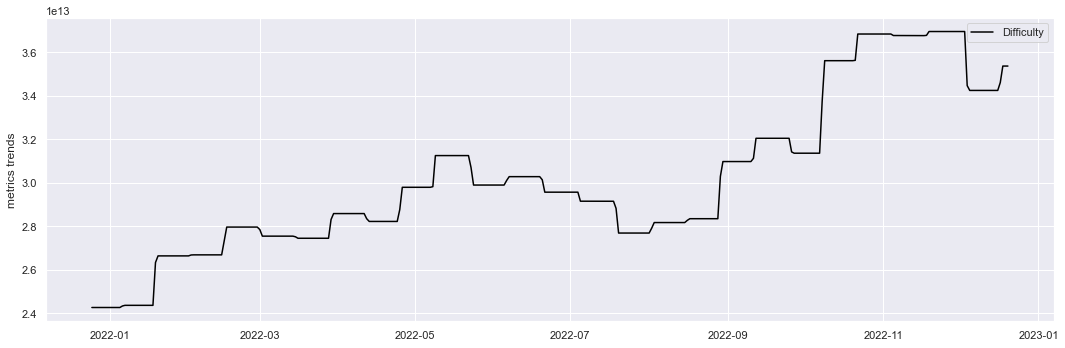

In [39]:
sns.set()

plt.figure(figsize=(15,5))
plt.plot(df_merged['difficulty'],
         label='Difficulty',
         color='black')

plt.ylabel('metrics trends')
plt.legend();
plt.tight_layout();

In [41]:
df_merged.to_csv('data/bitcoin.csv')